#### Notes



#### Yahia Ehab Mohamed 7037125 Tut_[01]

# Data Integration

### Data Load

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("appearances.csv")

### Data Exploration

In [2]:
df.head(10)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
5,2234421_146889,2234421,146889,195,190,2012-07-05,Peter Ankersen,ELQ,1,0,0,0,90
6,2235539_28716,2235539,28716,282,7185,2012-07-05,Adi Adilovic,ELQ,0,0,0,0,90
7,2235539_69445,2235539,69445,282,19771,2012-07-05,Ivan Sesar,ELQ,1,0,0,1,90
8,2235545_19409,2235545,19409,317,200,2012-07-05,Willem Janssen,ELQ,0,0,0,0,45
9,2235545_30003,2235545,30003,317,317,2012-07-05,Wout Brama,ELQ,0,0,0,0,90


#### Data Info and Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513742 entries, 0 to 1513741
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1513742 non-null  object
 1   game_id                 1513742 non-null  int64 
 2   player_id               1513742 non-null  int64 
 3   player_club_id          1513742 non-null  int64 
 4   player_current_club_id  1513742 non-null  int64 
 5   date                    1513742 non-null  object
 6   player_name             1513418 non-null  object
 7   competition_id          1513742 non-null  object
 8   yellow_cards            1513742 non-null  int64 
 9   red_cards               1513742 non-null  int64 
 10  goals                   1513742 non-null  int64 
 11  assists                 1513742 non-null  int64 
 12  minutes_played          1513742 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 150.1+ MB


#### Unneeded Columns to drop

In [5]:
# List of columns to drop
columns_to_drop = [
    "player_club_id",
    "player_current_club_id",
    "player_name",
    "game_id",
    "competition_id",
    "player_id",
    "appearance_id",
]

# Drop columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df.head())

         date  yellow_cards  red_cards  goals  assists  minutes_played
0  2012-07-03             0          0      2        0              90
1  2012-07-05             0          0      0        0              90
2  2012-07-05             0          0      0        0              45
3  2012-07-05             0          0      0        0              90
4  2012-07-05             0          0      0        1              90


#### Regularization to the date column to Season

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['season'] = df['date'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')
df = df.drop(columns=['date'])
df.head()

,yellow_cards,red_cards,goals,assists,minutes_played,season
0,0,0,2,0,90,Summer
1,0,0,0,0,90,Summer
2,0,0,0,0,45,Summer
3,0,0,0,0,90,Summer
4,0,0,0,1,90,Summer


#### Remove Outliers

In [7]:
# drop columns with yellow cards more than 2 and less than 1(with each other) or red cards more than 1
df = df.drop(df[(df["red_cards"] > 1)].index)
df = df.drop(df[(df["yellow_cards"] > 2)].index)
df = df.drop(df[(df["yellow_cards"] == 2) & (df["red_cards"] != 1)].index)

# drop columns with minutes played more than 120
df = df.drop(df[(df["minutes_played"] > 120)].index)

#### Discretize to the minuted played column 

In [8]:
df['minutes_played'] = pd.cut(df['minutes_played'], bins=[0, 15, 30, 45, 60, 75, 90, 105, 120], labels=['0-15', '15-30', '30-45', '45-60', '60-75', '75-90', '90-105', '105-120'])

#### Specify Datatype

In [9]:
df['yellow_cards'] = df['yellow_cards'].astype('int')
df['red_cards'] = df['red_cards'].astype('int')
df['goals'] = df['goals'].astype('int')
df['assists'] = df['assists'].astype('int')
df['minutes_played'] = df['minutes_played'].astype('category')
df['season'] = df['season'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1507475 entries, 0 to 1513741
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   yellow_cards    1507475 non-null  int32   
 1   red_cards       1507475 non-null  int32   
 2   goals           1507475 non-null  int32   
 3   assists         1507475 non-null  int32   
 4   minutes_played  1507475 non-null  category
 5   season          1507475 non-null  category
dtypes: category(2), int32(4)
memory usage: 37.4 MB


# Data Analysis

In [11]:
df1 = df[['goals', 'assists', 'season']]
df2 = df[['yellow_cards', 'red_cards', 'minutes_played']]

## First Research

In [12]:
#add 4th column to df1 with sum of goals and assists
df1['goals_assists'] = df1['goals'] + df1['assists']

df1.head()

C:\Users\Yahia\AppData\Local\Temp\ipykernel_9496\2123487547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['goals_assists'] = df1['goals'] + df1['assists']


,goals,assists,season,goals_assists
0,2,0,Summer,2
1,0,0,Summer,0
2,0,0,Summer,0
3,0,0,Summer,0
4,0,1,Summer,1


C:\Users\Yahia\AppData\Local\Temp\ipykernel_9496\3096701900.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Yahia\AppData\Local\Temp\ipykernel_9496\3096701900.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


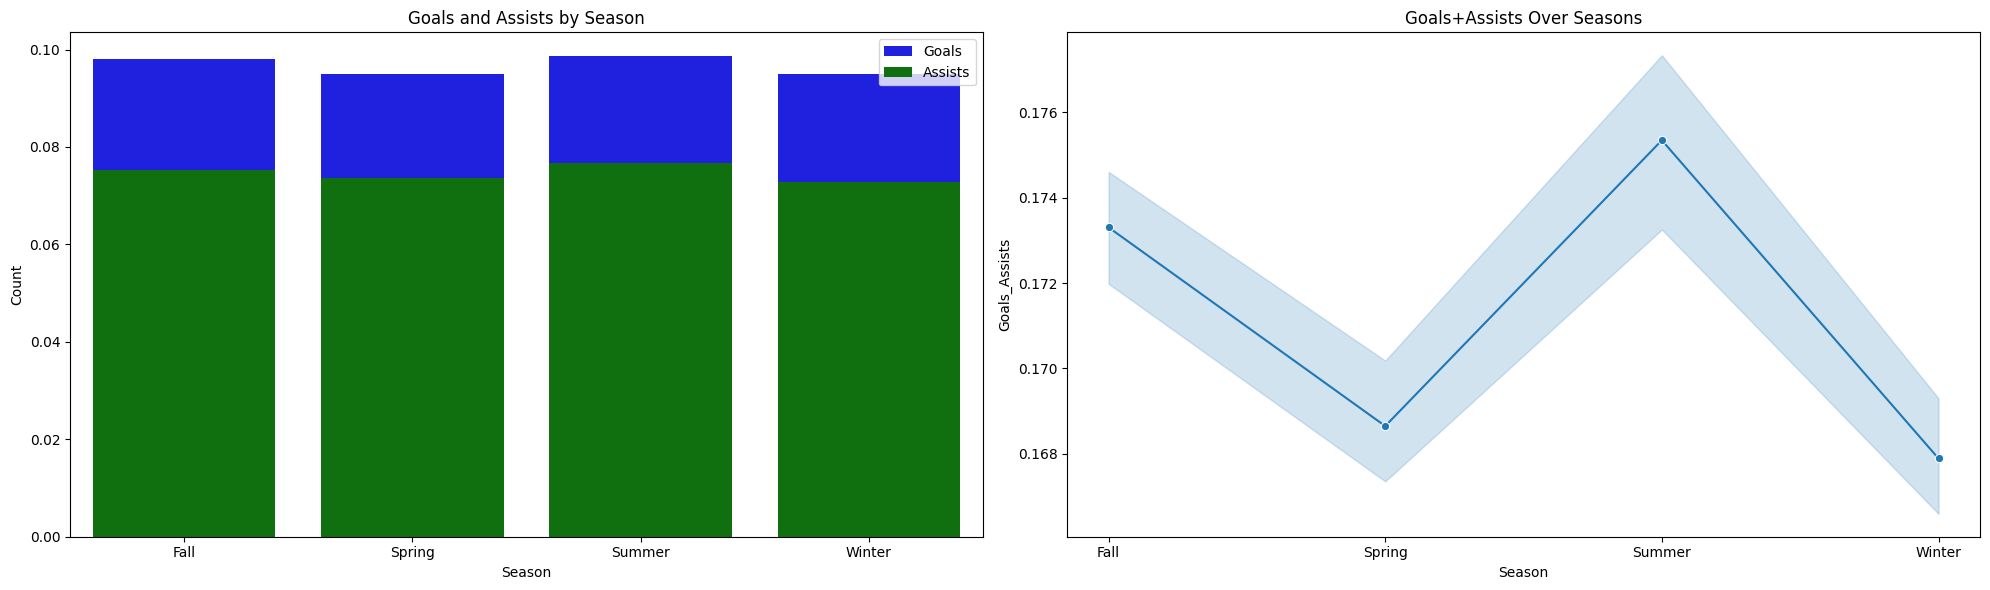

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Bar plot for goals and assists by season
sns.barplot(
    x="season", y="goals", data=df1, ci=None, color="blue", label="Goals", ax=axes[0]
)
sns.barplot(
    x="season",
    y="assists",
    data=df1,
    ci=None,
    color="green",
    label="Assists",
    ax=axes[0],
)
axes[0].set_title("Goals and Assists by Season")
axes[0].set_xlabel("Season")
axes[0].set_ylabel("Count")
axes[0].legend()

# Line Plot
sns.lineplot(data=df1, x="season", y="goals_assists", marker="o", ax=axes[1])

# Add labels and title
axes[1].set_title("Goals+Assists Over Seasons")
axes[1].set_xlabel("Season")
axes[1].set_ylabel("Goals_Assists")

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### Research One 
The analysis shows that most goals and assists happen during the summer, likely because more games are played in warmer weather. As the seasons change, we see a gradual decrease in goals and assists, with fall and spring showing intermediate counts. Winter stands out with the lowest numbers, possibly indicating fewer games or a different style of play. These findings provide insights into when players tend to perform their best, offering useful information for teams and players in planning their strategies.

## Second Research

In [14]:
df2['yellow_cards_red_cards'] = df2['yellow_cards'] + df2['red_cards']

df2.head()

C:\Users\Yahia\AppData\Local\Temp\ipykernel_9496\605934169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['yellow_cards_red_cards'] = df2['yellow_cards'] + df2['red_cards']


,yellow_cards,red_cards,minutes_played,yellow_cards_red_cards
0,0,0,75-90,0
1,0,0,75-90,0
2,0,0,30-45,0
3,0,0,75-90,0
4,0,0,75-90,0


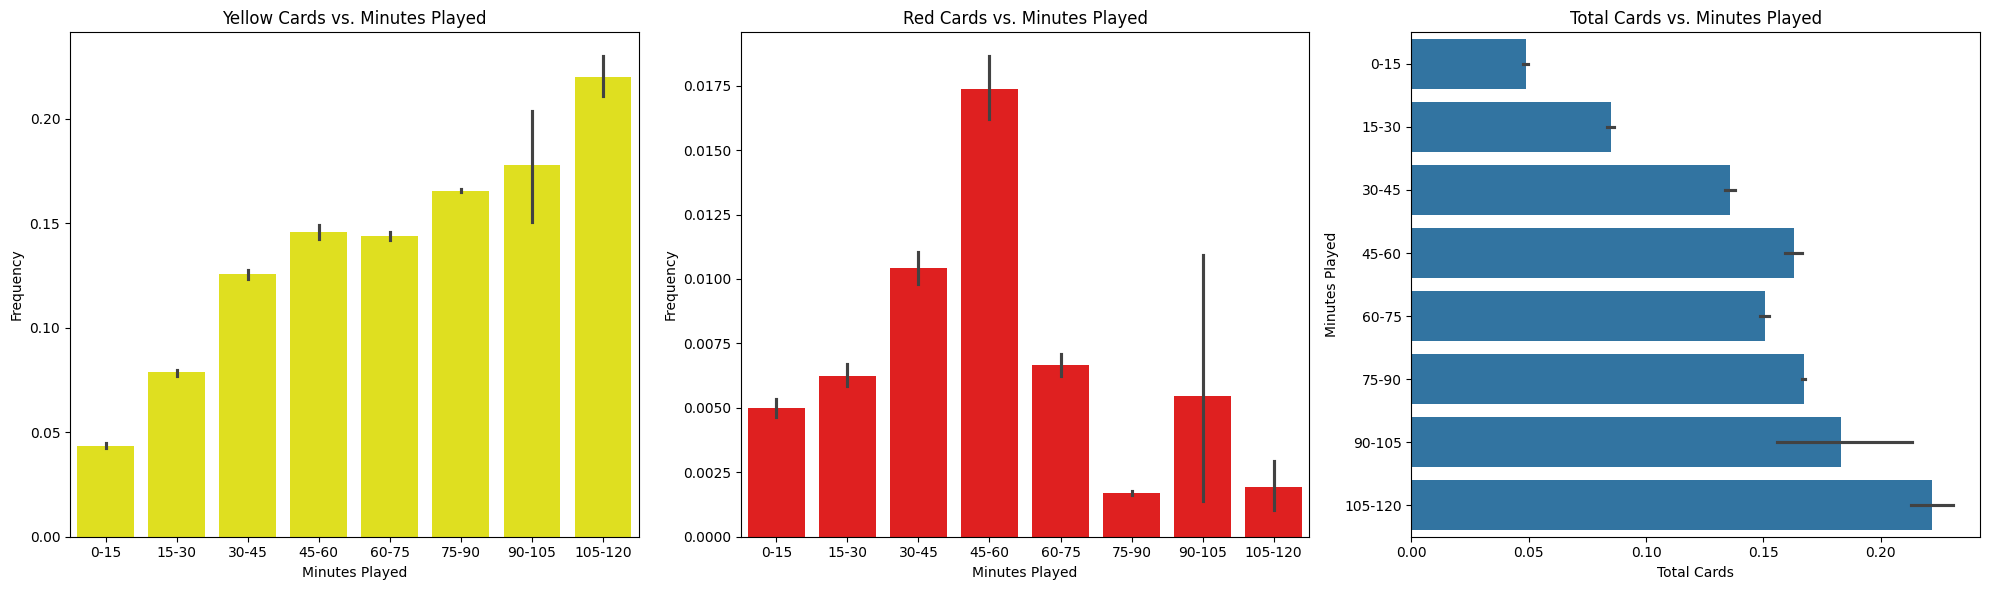

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Yellow Cards vs. Minutes Played (using histogram)
sns.barplot(x="minutes_played", y="yellow_cards", data=df2, color="yellow", ax=axes[0])
axes[0].set_title("Yellow Cards vs. Minutes Played")
axes[0].set_xlabel("Minutes Played")
axes[0].set_ylabel("Frequency")

# Plot 2: Red Cards vs. Minutes Played (using histogram)
sns.barplot(x="minutes_played", y="red_cards", data=df2, color="red", ax=axes[1])
axes[1].set_title("Red Cards vs. Minutes Played")
axes[1].set_xlabel("Minutes Played")
axes[1].set_ylabel("Frequency")

# Plot 3: Total Cards vs. Minutes Played (using bar plot)
sns.barplot(x="yellow_cards_red_cards", y="minutes_played", data=df2, ax=axes[2])
axes[2].set_title("Total Cards vs. Minutes Played")
axes[2].set_xlabel("Total Cards")
axes[2].set_ylabel("Minutes Played")

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

### Research Two

The analysis reveals a clear connection between player game time and the accumulation of yellow and red cards. As players spend more time on the field, the frequency of both types of cards increases.
Notably, red cards show a concentrated spike between 45 and 60 minutes, suggesting a critical period for disciplinary actions. In contrast, yellow cards exhibit a gradual rise with extended playing time, indicating a progressive increase in cautions throughout a game.

# Bonus

In [ ]:
import time
from IPython.display import Image

print(
    "Finally After This Project. Dont forget that the stats are just numbers."
    + "Here is the GOAT"
)


time.sleep(10)
Image(filename="GOAT.jpg")